In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from sklearn.model_selection import train_test_split

In [2]:
dataframe=pd.read_csv(r"C:\Users\nupur\python data science\datasets\Algerian_forest_fires_dataset_UPDATE.csv")

In [5]:
dataframe

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
df=dataframe.reset_index()

In [7]:
cname=df.iloc[0].values
cname

array(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype=object)

In [8]:
db=pd.DataFrame(df,columns=cname)

In [9]:
df.columns=db.columns

In [10]:
df.drop([0],inplace=True)

In [11]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [12]:
df.drop(index=[123,124],inplace=True)

In [13]:
df.columns=list(map(str.strip,df.columns))
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [14]:
df.iloc[[121]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire


In [15]:
for i in df.columns:
    print(i,df[i].dtype)

day object
month object
year object
Temperature object
RH object
Ws object
Rain object
FFMC object
DMC object
DC object
ISI object
BUI object
FWI object
Classes object


In [16]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feature in features_nan:
    print("The feature is {} and missing values in {}%".format(feature,np.round(df[feature].isnull().mean(),4)))

The feature is Classes and missing values in 0.0041%


In [17]:
df[df['Classes'].isnull()==True]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
168,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [18]:
df.drop(index=168,inplace=True)

In [19]:
df['Classes'].isnull().sum()

0

In [20]:
for i in range(0,243):
    df['Classes'].iloc[i]=df['Classes'].iloc[i].strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [21]:
df.Classes

1      not fire
2      not fire
3      not fire
4      not fire
5      not fire
         ...   
242        fire
243    not fire
244    not fire
245    not fire
246    not fire
Name: Classes, Length: 243, dtype: object

In [22]:
df['Classes']=df['Classes'].map({'not fire':0, 'fire':1})

In [23]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
2,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
3,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
4,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
5,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1
243,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
244,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [39]:
df.columns
for i in range(3,13):
    print(str(df.columns[i]))
    df[df.columns[i]]=df[df.columns[i]].astype(str).astype(float)

Temperature
RH
Ws
Rain
FFMC
DMC
DC
ISI
BUI
FWI


In [40]:
for i in df.columns:
    print(i,df[i].dtype)

day object
month object
year object
Temperature float64
RH float64
Ws float64
Rain float64
FFMC float64
DMC float64
DC float64
ISI float64
BUI float64
FWI float64
Classes int64


In [41]:
corr=df.corr()
corr

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123


<Axes: >

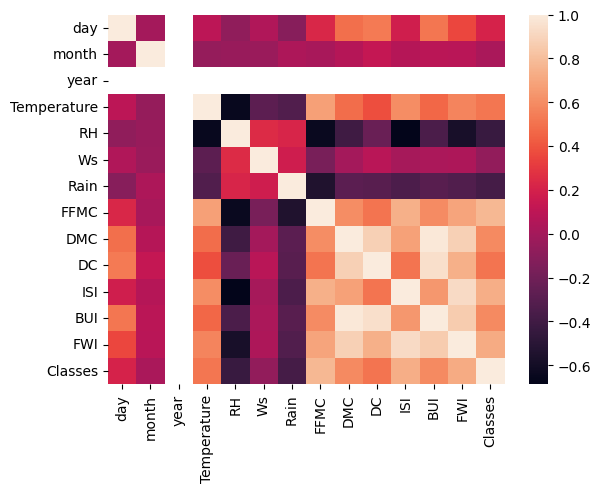

In [42]:
sns.heatmap(corr)


In [43]:
df.drop(axis=1,columns=["BUI",'year'],inplace=True)

<Axes: >

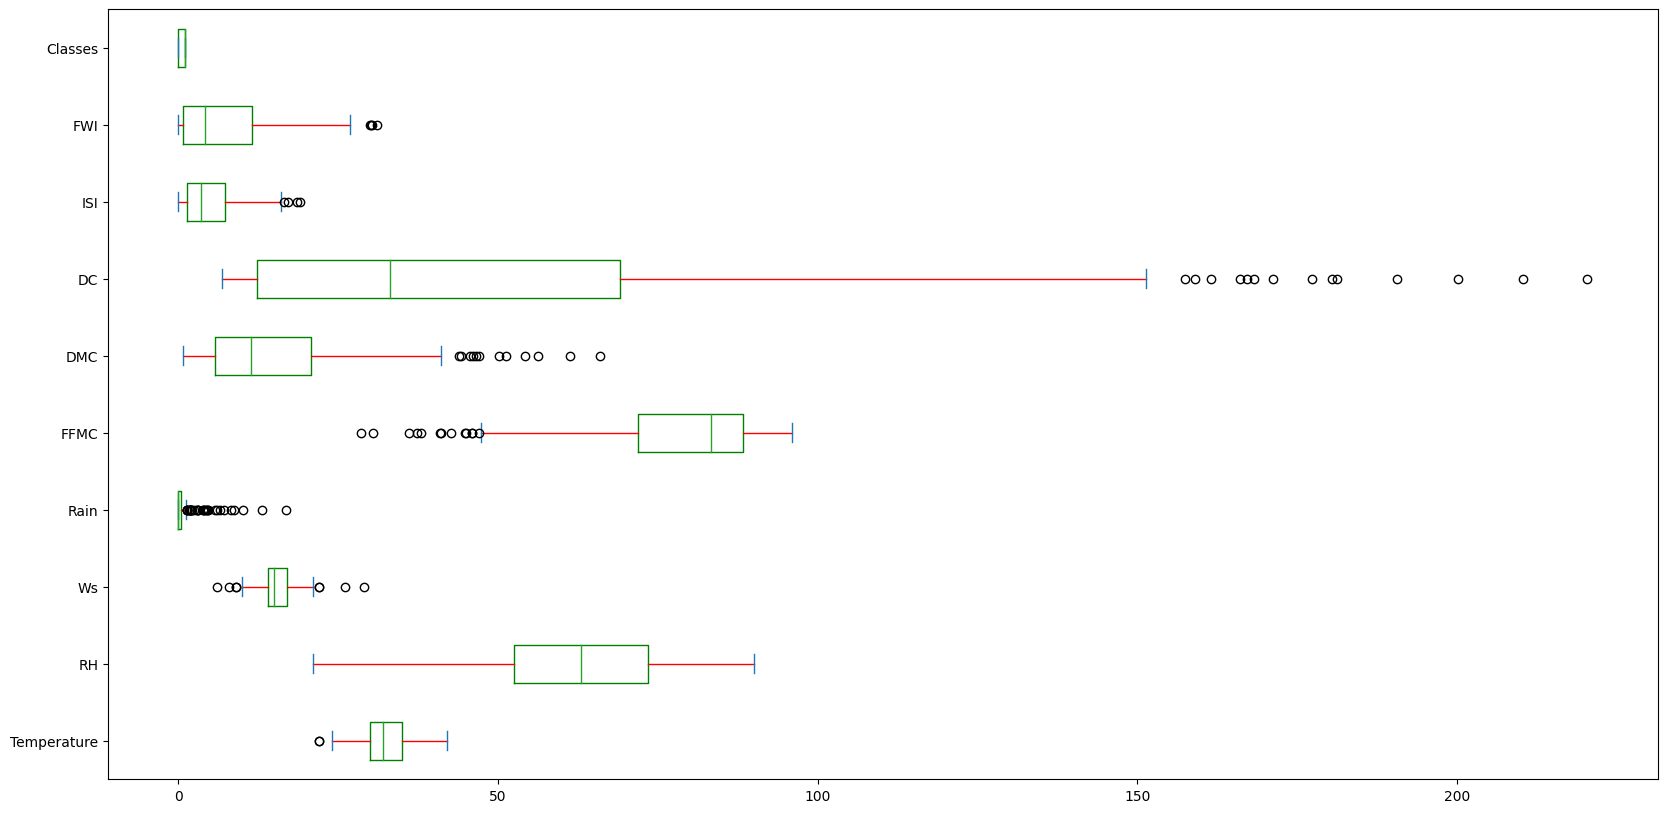

In [44]:
df.plot(kind='box',figsize=(20,10),color={'boxes':'g',"whiskers":'r'},vert=False)

In [45]:
def outlier():
    a=input("enter the column name")
    print(df[a].describe().values)
    iqr=df[a].describe().values[6]-df[a].describe().values[4]
    print(iqr)
    lowerfence=df[a].describe().values[4]-(1.5*iqr)
    upperfence=df[a].describe().values[6]+(1.5*iqr)
    print(lowerfence)
    print(upperfence)
    for i in range(1,243):
        if df[a].iloc[i]<lowerfence:
            df[a].iloc[i]=lowerfence
        if df[a].iloc[i]>upperfence:
            df[a].iloc[i]=upperfence

In [53]:
outlier()

enter the column nameTemperature
[243.          32.15226337   3.62803948  22.          30.
  32.          35.          42.        ]
5.0
22.5
42.5


C:\Users\nupur\AppData\Local\Temp\ipykernel_17564\472078742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[a].iloc[i]=lowerfence
C:\Users\nupur\AppData\Local\Temp\ipykernel_17564\472078742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[a].iloc[i]=lowerfence


<Axes: >

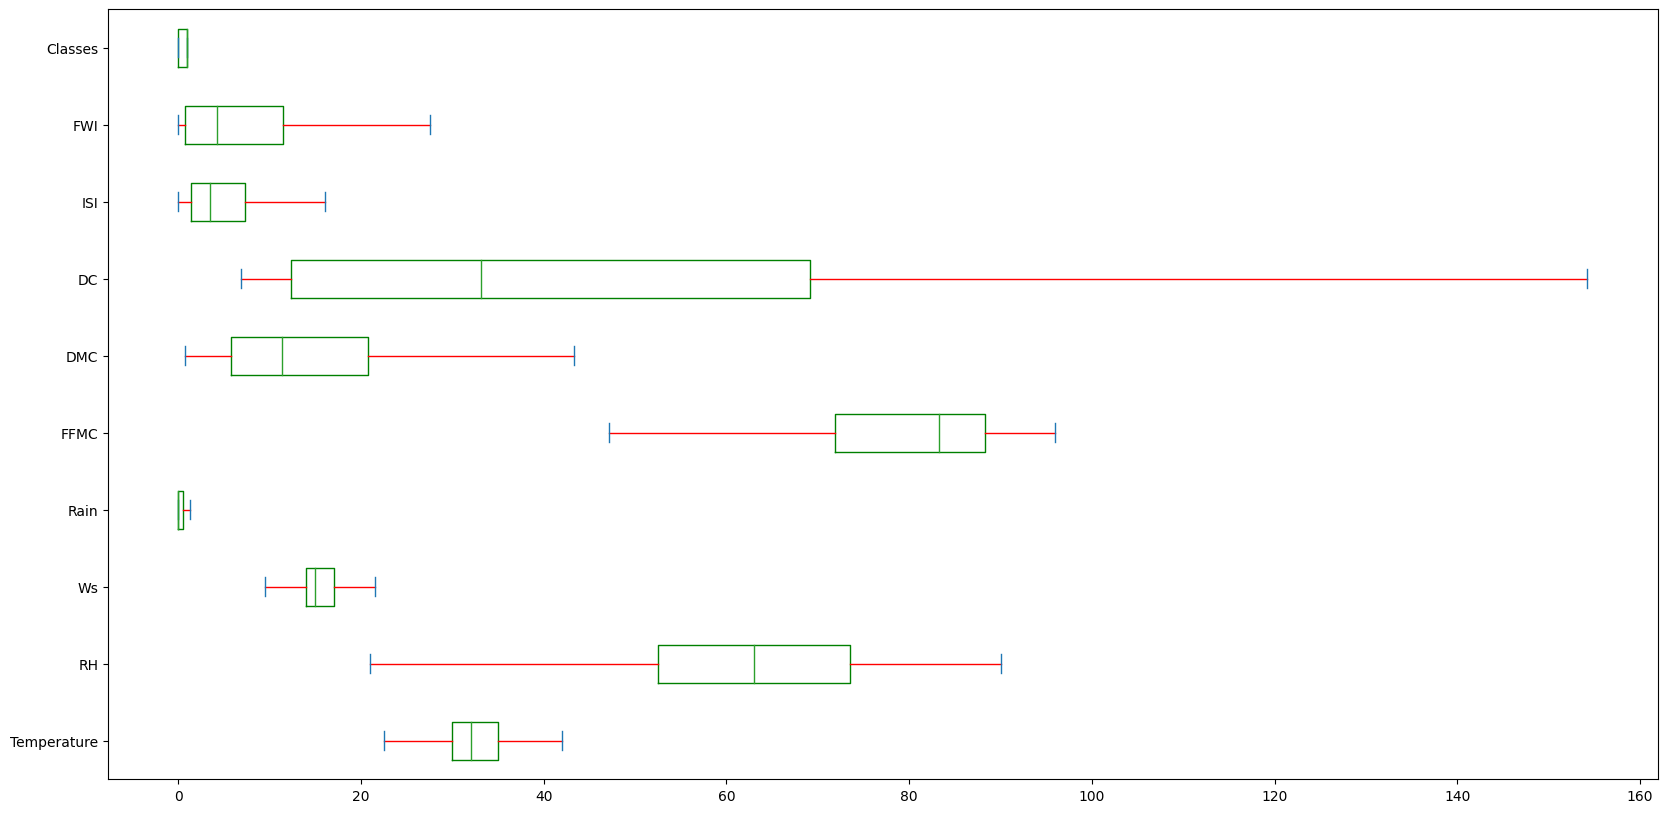

In [54]:
df.plot(kind='box',figsize=(20,10),color={'boxes':'g',"whiskers":'r'},vert=False)

# Regression

In [24]:
y=df['Temperature']
X=df.drop(columns='Temperature')

In [25]:
X

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,01,06,2012,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
2,02,06,2012,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
3,03,06,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
4,04,06,2012,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
5,05,06,2012,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,2012,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1
243,27,09,2012,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
244,28,09,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,29,09,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Linear Regression

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression
rg_LR=LinearRegression()
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept': [True, False]}
regressor_LR=GridSearchCV(rg_LR,parameters,scoring='neg_mean_squared_error',cv=5)
regressor_LR.fit(x_train,y_train)
reg_pred=regressor_LR.predict(x_test)
training_pred=regressor_LR.predict(x_train)

In [34]:
print(regressor_LR.best_params_)

{'fit_intercept': True}


In [109]:
reg_pred=regressor_LR.predict(x_test)
training_pred=regressor_LR.predict(x_train)

In [110]:
from sklearn.metrics import r2_score
score_LR_test=r2_score(reg_pred,y_test)
score_LR_train=r2_score(training_pred,y_train)
print("score of training data:",score_LR_train,"score of test data:",score_LR_test)

score of training data: 0.3614566125403086 score of test data: 0.3252200040931993


In [111]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg_pred,y_test)

5.518880467157571

#Decision tree regressor

In [112]:
from sklearn.tree import DecisionTreeRegressor
rg_DT=DecisionTreeRegressor()
parameters = {'max_depth':[5,10,20,15],
              'min_samples_split':[2,5,10,0.01,0.05,0.1]}
regressor_DT=GridSearchCV(rg_DT,parameters,scoring='neg_mean_squared_error',cv=5)
regressor_DT.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 20, 15],
                         'min_samples_split': [2, 5, 10, 0.01, 0.05, 0.1]},
             scoring='neg_mean_squared_error')

In [113]:
print(regressor_DT.best_params_)

{'max_depth': 5, 'min_samples_split': 0.1}


In [114]:
reg_pred=regressor_DT.predict(X_test)
training_pred=regressor_DT.predict(X_train)
score_DT_test=r2_score(reg_pred,y_test)
score_DT_train=r2_score(training_pred,y_train)
print("score of training data:",score_DT_train,"score of test data:",score_DT_test)

score of training data: 0.6646175652905975 score of test data: 0.4741115429422035


In [115]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg_pred,y_test)

5.332614361169912

#svm regression

In [153]:
from sklearn.svm import SVR
rg_SVR=SVR()
parameters = {"kernel": ["linear", "poly", "rbf", "sigmoid"],
              "C": [0.1, 1, 10, 100]}
regressor_SVR=GridSearchCV(rg_SVR,parameters,scoring='neg_mean_squared_error',cv=5)
regressor_SVR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [154]:
print(regressor_SVR.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [156]:
reg_pred=regressor_SVR.predict(x_test)
training_pred=regressor_SVR.predict(x_train)
score_SVR_test=r2_score(reg_pred,y_test)
score_SVR_train=r2_score(training_pred,y_train)
print("score of training data:",score_SVR_train,"score of test data:",score_SVR_test)

score of training data: 0.8433802817053493 score of test data: 0.6972401291679924


In [119]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg_pred,y_test)

2.8084326722121933

#knn regressor

In [120]:
from sklearn.neighbors import KNeighborsRegressor
rg_KNN=KNeighborsRegressor()
parameters = {"n_neighbors": [1, 2, 3, 4, 5, 10, 20],
              "weights": ["uniform", "distance"],
              "metric": ["euclidean", "manhattan", "minkowski"]}
regressor_KNN=GridSearchCV(rg_KNN,parameters,scoring='neg_mean_squared_error',cv=5)
regressor_KNN.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 10, 20],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [121]:
print(regressor_KNN.best_params_)

{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


In [122]:
reg_pred=regressor_KNN.predict(x_test)
training_pred=regressor_KNN.predict(x_train)
score_KNN_test=r2_score(reg_pred,y_test)
score_KNN_train=r2_score(training_pred,y_train)
print("score of training data:",score_KNN_train,"score of test data:",score_KNN_test)

score of training data: 1.0 score of test data: 0.4689543142020357


In [123]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg_pred,y_test)

4.433404555676602

#Random forest regressor

In [124]:
from sklearn.ensemble import RandomForestRegressor
rg_RF=RandomForestRegressor()
parameters = {"n_estimators": [10, 50, 100, 200],
              "max_depth": [None, 5, 10, 15, 20],
              "min_samples_split": [2, 5, 10, 0.01, 0.05, 0.1]}
regressor_RF=GridSearchCV(rg_RF,parameters,scoring='neg_mean_squared_error',cv=5)
regressor_RF.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 0.01, 0.05, 0.1],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [125]:
print(regressor_RF.best_params_)

{'max_depth': 15, 'min_samples_split': 0.05, 'n_estimators': 100}


In [126]:
reg_pred=regressor_RF.predict(X_test)
training_pred=regressor_RF.predict(X_train)
score_RF_test=r2_score(reg_pred,y_test)
score_RF_train=r2_score(training_pred,y_train)
print("score of training data:",score_RF_train,"score of test data:",score_RF_test)

score of training data: 0.8227663694352649 score of test data: 0.4361935624300065


In [127]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg_pred,y_test)

4.180669865659851

#Adaboost regressor

In [128]:
from sklearn.ensemble import AdaBoostRegressor
rg_AB=AdaBoostRegressor()
parameters = {"estimator": [DecisionTreeRegressor(), LinearRegression(), SVR()],
              "n_estimators": [10, 50, 100, 200],
              "learning_rate": [0.01, 0.1, 1, 10],
              "loss": ["linear", "square", "exponential"]}
regressor_AB=GridSearchCV(rg_AB,parameters,scoring='neg_mean_squared_error',cv=5)
regressor_AB.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'estimator': [DecisionTreeRegressor(),
                                       LinearRegression(), SVR()],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [129]:
print(regressor_AB.best_params_)

{'estimator': DecisionTreeRegressor(), 'learning_rate': 1, 'loss': 'square', 'n_estimators': 200}


In [130]:
reg_pred=regressor_AB.predict(X_test)
training_pred=regressor_AB.predict(X_train)
score_AB_test=r2_score(reg_pred,y_test)
score_AB_train=r2_score(training_pred,y_train)
print("score of training data:",score_AB_train,"score of test data:",score_AB_test)

score of training data: 0.980583646344987 score of test data: 0.6308130761633011


In [131]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg_pred,y_test)

4.101851851851852

#Gradient boosting regressor

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
rg_GB=GradientBoostingRegressor()
parameters = {"n_estimators": [10, 50, 100, 200],
              "learning_rate": [0.01, 0.1, 1, 10],
              "max_depth": [None, 3, 5, 10]}
regressor_GB=GridSearchCV(rg_GB,parameters,scoring='neg_mean_squared_error',cv=5)
regressor_GB.fit(X_train,y_train)


KeyboardInterrupt



In [106]:
print(regressor_GB.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [107]:
reg_pred=regressor_GB.predict(X_test)
training_pred=regressor_GB.predict(X_train)
score_GB_test=r2_score(reg_pred,y_test)
score_GB_train=r2_score(training_pred,y_train)
print("score of training data:",score_GB_train,"score of test data:",score_GB_test)

score of training data: 0.9693906822610352 score of test data: 0.6159786538140584


In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(reg_pred,y_test)

3.37384540779251

# classification

In [133]:
y=df['Classes']
X=df.drop(columns='Classes')

In [134]:
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI
1,01,06,29.0,57.0,18.0,0.00,65.700,3.4,7.6,1.3,0.5
2,02,06,29.0,61.0,13.0,1.25,64.400,4.1,7.6,1.0,0.4
3,03,06,26.0,82.0,21.5,1.25,47.175,2.5,7.1,0.3,0.1
4,04,06,25.0,89.0,13.0,1.25,47.175,1.3,6.9,0.0,0.0
5,05,06,27.0,77.0,16.0,0.00,64.800,3.0,14.2,1.2,0.5
...,...,...,...,...,...,...,...,...,...,...,...
242,26,09,30.0,65.0,14.0,0.00,85.400,16.0,44.5,4.5,6.5
243,27,09,28.0,87.0,15.0,1.25,47.175,6.5,8.0,0.1,0.0
244,28,09,27.0,87.0,21.5,0.50,47.175,3.5,7.9,0.4,0.2
245,29,09,24.0,54.0,18.0,0.10,79.700,4.3,15.2,1.7,0.7


In [135]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [136]:
Xc_test

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI
25,25,06,31.0,64.0,15.0,0.00,86.7,14.2,63.8,5.7,8.4
7,07,06,33.0,54.0,13.0,0.00,88.2,9.9,30.5,6.4,7.2
155,01,07,28.0,58.0,18.0,1.25,63.7,3.2,8.5,1.2,0.5
236,20,09,34.0,58.0,13.0,0.20,79.5,18.7,88.0,2.1,3.8
242,26,09,30.0,65.0,14.0,0.00,85.4,16.0,44.5,4.5,6.5
...,...,...,...,...,...,...,...,...,...,...,...
245,29,09,24.0,54.0,18.0,0.10,79.7,4.3,15.2,1.7,0.7
6,06,06,31.0,67.0,14.0,0.00,82.6,5.8,22.2,3.1,2.5
57,27,07,36.0,48.0,13.0,0.00,90.3,22.2,108.5,8.7,15.3
127,03,06,29.0,80.0,14.0,1.25,48.7,2.2,7.6,0.3,0.1


#logistic regression

In [138]:
from sklearn.linear_model import LogisticRegression
cl_LR=LogisticRegression()
parameters = {"penalty": ["l1", "l2", "elasticnet"],
              "C": [0.01, 0.1, 1, 10, 100]}
classifier_LR=GridSearchCV(cl_LR,parameters,scoring='accuracy',cv=5)
classifier_LR.fit(Xc_train,yc_train)

C:\Users\nupur\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nupur\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

C:\Users\nupur\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nupur\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [139]:
print(classifier_LR.best_params_)

{'C': 0.01, 'penalty': 'l2'}


In [141]:
prediction_cl=classifier_LR.predict(Xc_test)
train_cl=classifier_LR.predict(Xc_train)
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_recall_curve
print("accuracy of test data",accuracy_score(prediction_cl,yc_test))
print("accuracy of train data",accuracy_score(train_cl,yc_train))
print(confusion_matrix(yc_test,prediction_cl))
print(f1_score(yc_test,prediction_cl))

accuracy of test data 0.9629629629629629
accuracy of train data 0.9691358024691358
[[31  2]
 [ 1 47]]
0.9690721649484536


#Decision tree classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier
cl_DT=DecisionTreeClassifier()
parameters = {"criterion": ["gini", "entropy"],
              "max_depth": [5, 10, 15, 20]}
classifier_DT=GridSearchCV(cl_DT,parameters,scoring='accuracy',cv=5)
classifier_DT.fit(Xc_train,yc_train)
print(classifier_DT.best_params_)

{'criterion': 'entropy', 'max_depth': 5}


In [118]:
prediction_cl=classifier_DT.predict(Xc_test)
train_cl=classifier_DT.predict(Xc_train)
from sklearn.metrics import accuracy_score
print("accuracy of test data",accuracy_score(prediction_cl,yc_test))
print("accuracy of train data",accuracy_score(train_cl,yc_train))
print(confusion_matrix(yc_test,prediction_cl))
print(f1_score(yc_test,prediction_cl))

accuracy of test data 0.9876543209876543
accuracy of train data 1.0
[[32  1]
 [ 0 48]]
0.9896907216494846


#Svm classifier

In [121]:
from sklearn.svm import SVC
cl_SVM=SVC()
parameters = {#"kernel": ["linear", "poly", "rbf", "sigmoid"],
              "C": [0.1, 1, 10, 100]}
classifier_SVM=GridSearchCV(cl_SVM,parameters,scoring='accuracy',cv=5)
classifier_SVM.fit(x_train,y_train)
print(classifier_SVM.best_params_)

{'C': 0.1}


In [122]:
prediction_cl=classifier_SVM.predict(x_test)
train_cl=classifier_SVM.predict(x_train)
from sklearn.metrics import accuracy_score
print("accuracy of test data",accuracy_score(prediction_cl,y_test))
print("accuracy of train data",accuracy_score(train_cl,y_train))
print(confusion_matrix(y_test,prediction_cl))
print(f1_score(y_test,prediction_cl))

accuracy of test data 0.9876543209876543
accuracy of train data 1.0
[[32  1]
 [ 0 48]]
0.9896907216494846


In [76]:
#KNN Classifier

In [125]:
from sklearn.neighbors import KNeighborsClassifier
cl_KNN=KNeighborsClassifier()
parameters = {"n_neighbors": [1, 2, 3, 4, 5, 10, 20],
              "weights": ["uniform", "distance"],
              "metric": ["euclidean", "manhattan", "minkowski"]}
classifier_KNN=GridSearchCV(cl_KNN,parameters,scoring='accuracy',cv=5)
classifier_KNN.fit(x_train,y_train)
print(classifier_KNN.best_params_)
prediction_cl=classifier_KNN.predict(x_test)
train_cl=classifier_KNN.predict(x_train)
from sklearn.metrics import accuracy_score
print("accuracy of test data",accuracy_score(prediction_cl,y_test))
print("accuracy of train data",accuracy_score(train_cl,y_train))
print(confusion_matrix(y_test,prediction_cl))
print(f1_score(y_test,prediction_cl))

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
accuracy of test data 0.9876543209876543
accuracy of train data 1.0
[[32  1]
 [ 0 48]]
0.9896907216494846


#Randomforest classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier
cl_RF=RandomForestClassifier()
parameters = {"n_estimators": [10, 50, 100, 200],
              "criterion": ["gini", "entropy"],
              "max_depth": [None, 5, 10, 15, 20]}
classifier_RF=GridSearchCV(cl_RF,parameters,scoring='accuracy',cv=5)
classifier_RF.fit(Xc_train,yc_train)
print(classifier_RF.best_params_)
prediction_cl=classifier_RF.predict(Xc_test)
train_cl=classifier_RF.predict(Xc_train)
from sklearn.metrics import accuracy_score
print("accuracy of test data",accuracy_score(prediction_cl,yc_test))
print("accuracy of train data",accuracy_score(train_cl,yc_train))
print(confusion_matrix(yc_test,prediction_cl))
print(f1_score(yc_test,prediction_cl))

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
accuracy of test data 0.9876543209876543
accuracy of train data 1.0
[[33  0]
 [ 1 47]]
0.9894736842105264


#Gradientboosting classifier

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
cl_GB=GradientBoostingClassifier()
parameters = {"n_estimators": [10, 50, 100, 200],
              "learning_rate": [0.01, 0.1, 1, 10],
              "max_depth": [3, 5, 10]}
classifier_GB=GridSearchCV(cl_GB,parameters,scoring='accuracy',cv=5)
classifier_GB.fit(Xc_train,yc_train)
print(classifier_GB.best_params_)
prediction_cl=classifier_GB.predict(Xc_test)
train_cl=classifier_GB.predict(Xc_train)
from sklearn.metrics import accuracy_score
print("accuracy of test data",accuracy_score(prediction_cl,yc_test))
print("accuracy of train data",accuracy_score(train_cl,yc_train))
print(confusion_matrix(yc_test,prediction_cl))
print(f1_score(yc_test,prediction_cl))

{'learning_rate': 10, 'max_depth': 10, 'n_estimators': 10}
accuracy of test data 1.0
accuracy of train data 1.0
[[33  0]
 [ 0 48]]
1.0


In [157]:
#for regression model
import pickle
pickle.dump(regressor_SVR,open('model1.pkl','wb'))
#for classification model
pickle.dump(classifier_GB,open('model2.pkl','wb'))

In [158]:
X_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes
25,25,06,64.0,15.0,0.00,86.7,14.2,63.8,5.7,8.4,1
7,07,06,54.0,13.0,0.00,88.2,9.9,30.5,6.4,7.2,1
155,01,07,58.0,18.0,1.25,63.7,3.2,8.5,1.2,0.5,0
236,20,09,58.0,13.0,0.20,79.5,18.7,88.0,2.1,3.8,0
242,26,09,65.0,14.0,0.00,85.4,16.0,44.5,4.5,6.5,1
...,...,...,...,...,...,...,...,...,...,...,...
245,29,09,54.0,18.0,0.10,79.7,4.3,15.2,1.7,0.7,0
6,06,06,67.0,14.0,0.00,82.6,5.8,22.2,3.1,2.5,1
57,27,07,48.0,13.0,0.00,90.3,22.2,108.5,8.7,15.3,1
127,03,06,80.0,14.0,1.25,48.7,2.2,7.6,0.3,0.1,0


In [160]:
pickl_rg=pickle.load(open('model1.pkl','rb'))
pickl_rg.predict(x_test)

array([32.21923358, 31.85546256, 28.23110095, 31.88609236, 29.57733685,
       35.01158486, 30.57701359, 35.175358  , 28.41076609, 29.85339217,
       29.16845818, 34.53045933, 32.05577639, 35.26383222, 35.85219476,
       32.23334189, 31.96538319, 27.61934954, 32.60916059, 31.77328721,
       31.70621032, 29.21068925, 30.66632785, 28.56513986, 38.15776334,
       36.41266378, 30.04810611, 34.42092809, 26.61338426, 32.49915967,
       29.03658997, 33.67632274, 32.44576296, 32.36244577, 31.74792944,
       30.56965933, 30.25671966, 34.80314289, 26.95392717, 25.59944958,
       34.57715519, 31.81051739, 31.44461744, 27.72680225, 37.40290915,
       32.72098458, 31.38070788, 31.8919516 , 34.66050701, 27.32449487,
       35.02882432, 35.97510239, 31.95803645, 35.17804897, 34.78644197,
       33.84176568, 32.74385634, 33.84414908, 30.17021696, 34.62195473,
       33.36622391, 29.2317492 , 29.74491772, 38.45772791, 32.43313162,
       30.95677614, 33.59632332, 34.11567404, 36.19052049, 25.55

In [168]:
x_test

array([[ 1.05929765e+00, -1.33591638e+00,  8.02841227e-02,
        -2.31346186e-01, -6.66662938e-01,  6.57477610e-01,
        -4.47772357e-02,  3.18421850e-01,  2.24647564e-01,
         1.61258992e-01,  9.05662586e-01],
       [-9.84985567e-01, -1.33591638e+00, -5.90129685e-01,
        -1.03301639e+00, -6.66662938e-01,  7.69179392e-01,
        -4.09593872e-01, -4.16589601e-01,  3.90906555e-01,
         4.10271656e-03,  9.05662586e-01],
       [-1.66641331e+00, -4.22758348e-01, -3.21964162e-01,
         9.71159123e-01,  1.95213910e+00, -1.05528305e+00,
        -9.78029096e-01, -9.02182753e-01, -8.44160231e-01,
        -8.73353156e-01, -1.10416397e+00],
       [ 4.91441198e-01,  1.40355772e+00, -3.21964162e-01,
        -1.03301639e+00, -2.47654612e-01,  1.21309055e-01,
         3.37007616e-01,  8.52574317e-01, -6.30398672e-01,
        -4.41173398e-01, -1.10416397e+00],
       [ 1.17286894e+00,  1.40355772e+00,  1.47325503e-01,
        -6.32181289e-01, -6.66662938e-01,  5.60669398e-01,
  

In [170]:
value=scaler.transform([X_test.iloc[25].values])
pickl_rg.predict(value)

C:\Users\nupur\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([36.41266378])

In [171]:
pickl_cl=pickle.load(open('model2.pkl','rb'))
pickl_cl.predict(Xc_test)

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [172]:
pickl_cl=pickle.load(open('model2.pkl','rb'))
pickl_cl.predict([Xc_test.iloc[25].values])[0]

C:\Users\nupur\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


1

In [3]:
#inserting dataset into mysql
import mysql.connector as conn
mydb=conn.connect(host="localhost",user="root",password="rootpassword@123")
cursor=mydb.cursor()
cursor.execute('show databases')
cursor.fetchall()

[('cardataset',),
 ('db1',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sys',)]

In [9]:

#cursor.execute("show tables")
cursor.fetchall()

[('client_master',),
 ('customer',),
 ('emp1',),
 ('emp2',),
 ('employee',),
 ('product_master',),
 ('salesman_master',),
 ('snam_mast',),
 ('student',),
 ('words',)]

In [10]:
cursor.execute("create database dataset")

In [11]:
cursor.execute('show databases')
cursor.fetchall()

[('cardataset',),
 ('dataset',),
 ('db1',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sys',)]

In [13]:
cursor.execute("create table dataset.Algerian_forest(day varchar(5),month varchar(10),year varchar(10),Temperature float(6,4),RH float(6,4),Ws float(6,4),Rain float(6,4),FFMC float(6,4),DMC float(6,4),DC float(6,4),ISI float(6,4),BUI float(6,4),FWI float(6,4),Classes int(4))")

In [16]:
cursor.execute("desc dataset.Algerian_forest")
cursor.fetchall()

[('day', 'varchar(5)', 'YES', '', None, ''),
 ('month', 'varchar(10)', 'YES', '', None, ''),
 ('year', 'varchar(10)', 'YES', '', None, ''),
 ('Temperature', 'float(6,4)', 'YES', '', None, ''),
 ('RH', 'float(6,4)', 'YES', '', None, ''),
 ('Ws', 'float(6,4)', 'YES', '', None, ''),
 ('Rain', 'float(6,4)', 'YES', '', None, ''),
 ('FFMC', 'float(6,4)', 'YES', '', None, ''),
 ('DMC', 'float(6,4)', 'YES', '', None, ''),
 ('DC', 'float(6,4)', 'YES', '', None, ''),
 ('ISI', 'float(6,4)', 'YES', '', None, ''),
 ('BUI', 'float(6,4)', 'YES', '', None, ''),
 ('FWI', 'float(6,4)', 'YES', '', None, ''),
 ('Classes', 'int', 'YES', '', None, '')]

In [15]:
cursor.execute("use dataset")
cursor.execute("show tables")
cursor.fetchall()

[('algerian_forest',)]

In [61]:
X_test.to_csv("rgdataset.csv",header=False,index=False)

In [60]:
X_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes
25,25,06,64.0,15.0,0.00,86.7,14.2,63.8,5.7,8.4,1
7,07,06,54.0,13.0,0.00,88.2,9.9,30.5,6.4,7.2,1
155,01,07,58.0,18.0,1.25,63.7,3.2,8.5,1.2,0.5,0
236,20,09,58.0,13.0,0.20,79.5,18.7,88.0,2.1,3.8,0
242,26,09,65.0,14.0,0.00,85.4,16.0,44.5,4.5,6.5,1
...,...,...,...,...,...,...,...,...,...,...,...
245,29,09,54.0,18.0,0.10,79.7,4.3,15.2,1.7,0.7,0
6,06,06,67.0,14.0,0.00,82.6,5.8,22.2,3.1,2.5,1
57,27,07,48.0,13.0,0.00,90.3,22.2,108.5,8.7,15.3,1
127,03,06,80.0,14.0,1.25,48.7,2.2,7.6,0.3,0.1,0


In [79]:
import csv
with open("rgdataset.csv","r+") as f:
    data=csv.reader(f,delimiter="\n")
    t=[]
    for i in data:
        c=i[0].split(",")
        print(f"inserting in  table ({c})")
        
        cursor.execute(f"insert into dataset.Algerian_forest(day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI,Classes) values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)",c)
mydb.commit()

inserting in  table (['25', '06', '64.0', '15.0', '0.0', '86.7', '14.2', '63.8', '5.7', '8.4', '1'])
inserting in  table (['07', '06', '54.0', '13.0', '0.0', '88.2', '9.9', '30.5', '6.4', '7.2', '1'])
inserting in  table (['01', '07', '58.0', '18.0', '1.25', '63.7', '3.2', '8.5', '1.2', '0.5', '0'])
inserting in  table (['20', '09', '58.0', '13.0', '0.2', '79.5', '18.7', '88.0', '2.1', '3.8', '0'])
inserting in  table (['26', '09', '65.0', '14.0', '0.0', '85.4', '16.0', '44.5', '4.5', '6.5', '1'])
inserting in  table (['25', '07', '64.0', '9.5', '1.2', '73.8', '11.7', '15.9', '1.1', '0.7', '0'])
inserting in  table (['03', '09', '75.0', '16.0', '0.0', '82.2', '4.4', '24.3', '3.3', '2.5', '1'])
inserting in  table (['29', '06', '36.0', '13.0', '0.6', '86.2', '17.9', '36.7', '4.8', '7.2', '1'])
inserting in  table (['10', '06', '79.0', '12.0', '0.0', '73.2', '9.5', '46.3', '1.3', '0.9', '0'])
inserting in  table (['22', '09', '50.0', '19.0', '0.6', '77.8', '10.6', '41.4', '2.4', '2.8', '

In [83]:
cursor.execute("select * from dataset.Algerian_forest")
cursor.fetchall()

[('25', '06', 64.0, 15.0, 0.0, 86.7, 14.2, 63.8, 5.7, 8.4, 1),
 ('07', '06', 54.0, 13.0, 0.0, 88.2, 9.9, 30.5, 6.4, 7.2, 1),
 ('01', '07', 58.0, 18.0, 1.25, 63.7, 3.2, 8.5, 1.2, 0.5, 0),
 ('20', '09', 58.0, 13.0, 0.2, 79.5, 18.7, 88.0, 2.1, 3.8, 0),
 ('26', '09', 65.0, 14.0, 0.0, 85.4, 16.0, 44.5, 4.5, 6.5, 1),
 ('25', '07', 64.0, 9.5, 1.2, 73.8, 11.7, 15.9, 1.1, 0.7, 0),
 ('03', '09', 75.0, 16.0, 0.0, 82.2, 4.4, 24.3, 3.3, 2.5, 1),
 ('29', '06', 36.0, 13.0, 0.6, 86.2, 17.9, 36.7, 4.8, 7.2, 1),
 ('10', '06', 79.0, 12.0, 0.0, 73.2, 9.5, 46.3, 1.3, 0.9, 0),
 ('22', '09', 50.0, 19.0, 0.6, 77.8, 10.6, 41.4, 2.4, 2.8, 0),
 ('16', '07', 76.0, 21.0, 0.0, 72.6, 7.0, 25.5, 0.7, 0.4, 0),
 ('25', '06', 64.0, 15.0, 0.0, 86.7, 14.2, 63.8, 5.7, 8.4, 1),
 ('07', '06', 54.0, 13.0, 0.0, 88.2, 9.9, 30.5, 6.4, 7.2, 1),
 ('01', '07', 58.0, 18.0, 1.25, 63.7, 3.2, 8.5, 1.2, 0.5, 0),
 ('20', '09', 58.0, 13.0, 0.2, 79.5, 18.7, 88.0, 2.1, 3.8, 0),
 ('26', '09', 65.0, 14.0, 0.0, 85.4, 16.0, 44.5, 4.5, 6.5, 1),


In [81]:
cursor.execute("alter table dataset.Algerian_forest drop column year")

In [82]:
cursor.execute("alter table dataset.Algerian_forest drop column Temperature")
cursor.execute("alter table dataset.Algerian_forest drop column BUI")